<a href="https://colab.research.google.com/github/amir-asari/AIDroneWorkshop-24-01-2022-/blob/main/BiomehsWorkshop(Part2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 2: Classification of Cats & Dogs Dataset Convolutional Neural Networks Using Transfer Learning Approach 


> In this case, the pre-trained CNN called VGG16 will be used



### Modules required

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

## Data preprocessing

### Data download

In this hands-on, you will use a dataset containing several thousand images of cats and dogs. Download and extract a zip file containing the images. Finallly the unzip images will be extracted to the folder named `cats_and_dogs_filtered`



In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'validation')

print(path_to_zip)
print(PATH)
!ls /root/.keras/datasets/cats_and_dogs_filtered
print('train folder directory:',train_dir)
print('train folder directory:',test_dir)



68616192/68606236 [==============================] - 0s 0us/step
/root/.keras/datasets/cats_and_dogs.zip
/root/.keras/datasets/cats_and_dogs_filtered
train  validation  vectorize.py
train folder directory: /root/.keras/datasets/cats_and_dogs_filtered/train
train folder directory: /root/.keras/datasets/cats_and_dogs_filtered/validation


After that, create a `tf.keras.preprocessing.image.ImageDataGenerator` object which will handle the image dataset for training and testing.

Then the object function called `flow_from_directory` is used provide batch of image dataset according to specification based on function input argument. 

In [ ]:
# normalization function
# train_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)
# test_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)

train_gen = tf.keras.preprocessing.image.ImageDataGenerator()
test_gen = tf.keras.preprocessing.image.ImageDataGenerator()

names = ["dogs" , "cats"] #make sure the spelling is similar to the folder name
train_batches = train_gen.flow_from_directory(
    train_dir,
    target_size = (224,224), #input image size for VGG16
    class_mode = 'sparse', #make label as integer value
    batch_size = 30,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

test_batches = train_gen.flow_from_directory(
    test_dir,
    target_size = (224,224), #input image size for VGG16
    class_mode = 'sparse', #make label as integer value
    batch_size = 30,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Show the first nine images and labels from the training images (training batches):

batch_images shape: (30, 224, 224, 3)
batch labels shape: (30,)


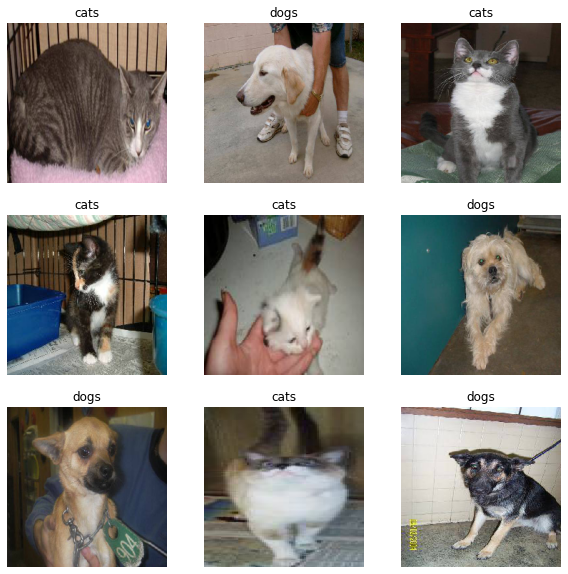

In [ ]:
single_train_image_batch = train_batches.next()  #single_train_batch[0] -> image  single_train_batch [1] -> label
batch_images = single_train_image_batch[0]
batch_labels = single_train_image_batch[1]
print('batch_images shape:',batch_images.shape)
print('batch labels shape:',batch_labels.shape)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(batch_images[i].astype("uint8"))
  plt.title(names[batch_labels[i].astype("int")])
  plt.axis("off")

## Create the CNN model through transfer learning approach using the pre-trained VGG16
You will create the CNN model from the VGG16 model developed at Visual Geometry Group, Univ. of Oxford. This is pre-trained on the ImageNet dataset, a large dataset consisting of over 14 million images and 1000 classes. ImageNet is a research training dataset with a wide variety of categories like `jackfruit` and `syringe`. This base of knowledge will help us classify cats and dogs from our specific dataset.



## VGG16 Arhitecture
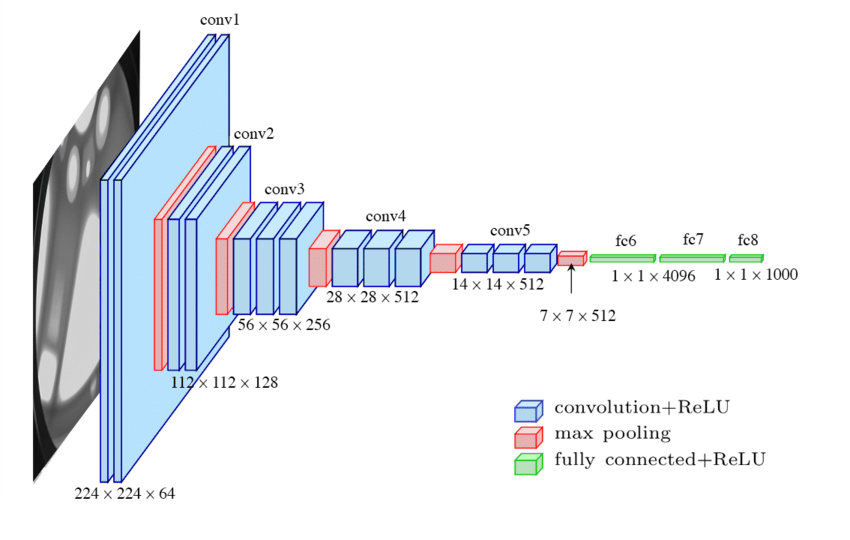

## Transfer Learning Approach
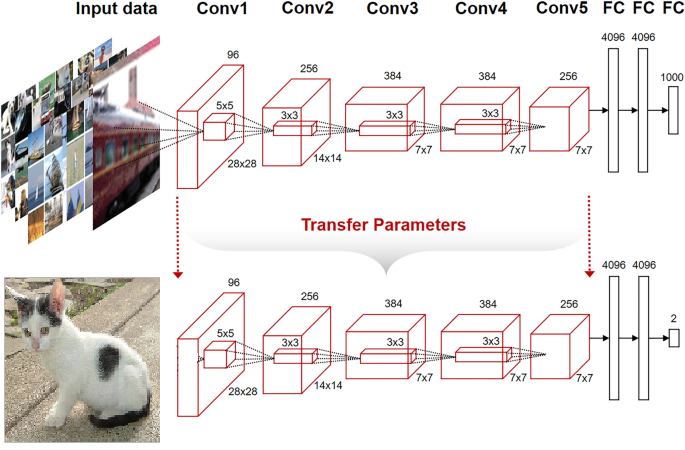

In [ ]:
# Create the base model from the pre-trained model VGG16
# IMG_SHAPE = IMG_SIZE + (3,)
# print(IMG_SIZE)
# print(IMG_SHAPE)

base_model = tf.keras.applications.VGG16()
# print(type(base_model))
print("****VGG16 original network arhitecture****")
base_model.summary()


553476096/553467096 [==============================] - 3s 0us/step
****VGG16 original network arhitecture****
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                 

Create new model, copy all layers in VGG16 from the 1st until 2nd last layer




In [ ]:
#Create our model by copying from the 1st layer to the 2nd last layer
model = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model.add(layer)

print("****model after removing copy all VGG16 layers and remove the last layer****")
model.summary()


****model after removing copy all VGG16 layers and remove the last layer****
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                             

Add the last layer with new dense layer with 2 outputs replacing the dense layer with 1000 outputs

In [ ]:
#Freezing the existing weights
for layer in model.layers:
    layer.trainable = False
print(model.summary())

#add new layer which will replace the previous VGG16 last layer
model.add(tf.keras.layers.Dense(2))

print("****model after add new dense layer replacing the previous VGG16 last layer****")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

## Set Loss and Optimizer Parameter, and Compile with the developed model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* Loss function - measures how accurate the model is during training, we want to minimize this with the optimizer.
* Optimizer - how the model is updated based on the data it sees and its loss function.
* Metrics - used to monitor the training and testing steps. "accuracy" is the fraction of images that are correctly classified.











In [ ]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ["accuracy"])

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_batches` which consists of both batches of images and labels.
2. The model learns to associate images and labels.

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [ ]:
model.fit(train_batches,epochs = 2)

Epoch 1/2
67/67 [==============================] - 8s 121ms/step - loss: 0.0428 - accuracy: 0.9840
Epoch 2/2
67/67 [==============================] - 8s 121ms/step - loss: 0.0343 - accuracy: 0.9845


### Test the model

In [ ]:
# print(test_batches.shape)
test_loss, test_acc = model.evaluate(test_batches)

print('Test accuracy:', test_acc)

34/34 [==============================] - 7s 191ms/step - loss: 0.1244 - accuracy: 0.9660
Test accuracy: 0.9660000205039978


Test the developed model in several test images and visual the image, the predicted label, actual label and the probability (in %)

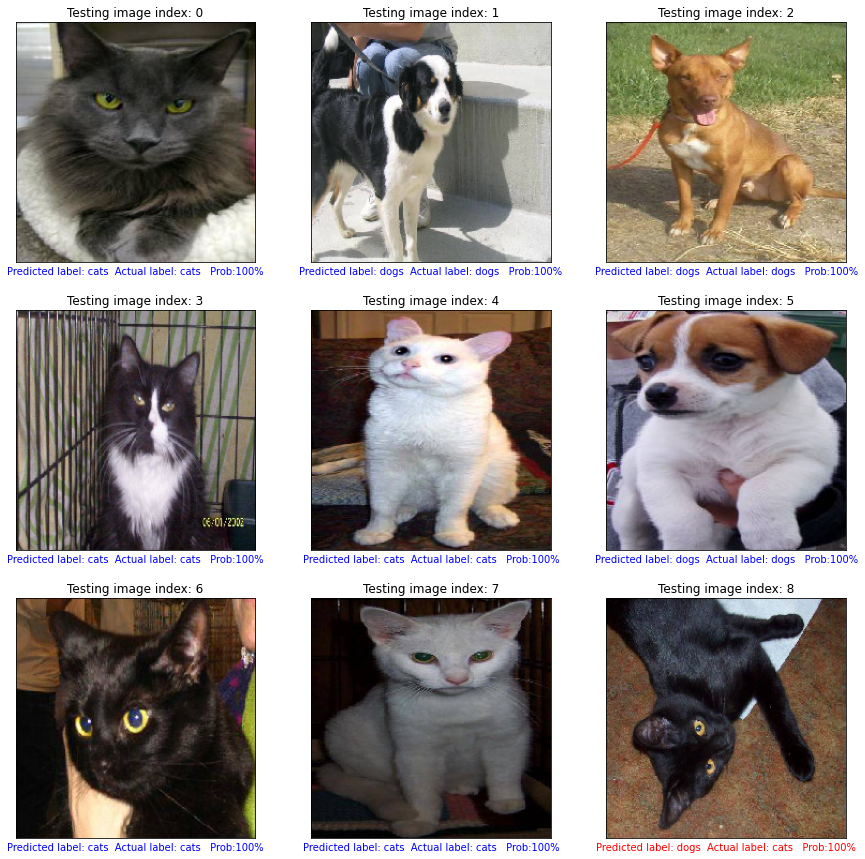

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i].astype("uint8"), img[i].astype("uint8")
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  predicted_label = np.argmax(predictions_array[i])
  
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Predicted label: {}  Actual label: {}   Prob:{:2.0f}%".format(names[predicted_label],
                                names[true_label],
                                100*np.max(predictions_array)),
                                color=color)


single_test_image_batch = test_batches.next()
predicted_label_prob = model(single_test_image_batch[0]) # single_test_image_batch[0] -> batches of images; single_test_image_batch[1] -> batches of label
predicted_label_prob = tf.nn.softmax(predicted_label_prob)


plt.figure(figsize=(15, 15))
for index in range(9):
  ax = plt.subplot(3, 3, index + 1)
  plot_image(index,predicted_label_prob,single_test_image_batch[1],single_test_image_batch[0])
  plt.title("Testing image index: {}".format(index))
  